# MCBDD Module III: Offline activity

## Question 1: What is factor analysis?

Factor analysis is a methode to find so called factors, to clarify and explain how the variables in a dataset are conected to each other and therby reduce the amount of dimensions in the dataset. So, if we have a dataset with 10 different variables we might be able to express that variation in the dataset with 3 factors.

## Question 2: What are the relationships between covariance matrix, factor analysis, and principal component analysis (PCA)?

PCA is like a version of FA, inthat they aim to do the same thing (i.e. reduce the dimension of the data). They differe in the way they do that: FA assumes that there are underlying factors in the data, while PCA forms the principle components based on the correlation of the variables. 
For PCA we calculate the covariance matrix of the data and from that the Eigenvectores, those are the principle components and the eigenvalues are the variance along the component. The Eigenvectores are ordered from largest Eigenvalue to lowest Eigenvalue, so if we want to represent the largest amount of variance with the least possible dimenstions, we can take the first n Eigenvectores, whose variance adds up to the amount we decided to be sufficiant and ignore all other Eigenvectores.

## Question 3: What do we mean with loadings?

If we multiply a Eigenvector by the square root of its Eigenvalue we get the loadings. Loadings are comparable by magnitude with the correlations between the variables.

## Question 4: Why factors are orthogonal to each other? What’s the consequence?

In PCA they are orthogonal to each other because the Eigenvectors of the Covariance matrix are alsways orthogonal, since the covariance matrix is symetrical. In FA, if we force the factors to be orthogonal to each other that means that these factors are not correlated.

## Question 5: Why factor analysis can be used as a generative model?

We can generate new samples from existing data by picking new samples from the distribution of the existing data, which while give us data points resemblying the existing data

## Question 6: What is the relationship between factor analysis and autoencoder?

They do the same thing in essence, but FA is faster and Autoencoder can find more complicated non-linear factores.

## Question 7: How would you explain factor analysis to yourself half year ago?

It is a methode to simplify data, so that it can be visualized easier, but at the same time trying to keep as much of the variance as possible.

## Code example:

For the FA I used data from https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data and a tutorial from https://www.datacamp.com/tutorial/introduction-factor-analysis. 

In [1]:
from factor_analyzer import FactorAnalyzer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("Maternal_Health_Risk_Data_Set.csv")
df.drop(['RiskLevel'],axis=1,inplace=True)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76


To check if it is resonable to analyze the data using FA we do two tests. 
First we do Bartlett’s Test of Sphericity. In this test we compare the correlation matrix to the identity matrix to make sure that they diverge significantly from each other for our dataset, so that we know a FA is suitable to use.

In [3]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
p_value


0.0

for our dataset the p-value is 0 so it is suitable to use for FA.

The second test that we do is the Kaiser-Meyer-Olkin (KMO) Test. It is a another measure of how suited the data is for FA. The test measures sampling adequacy for each variable in the model and for the complete model.

In [4]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.7030370514673676

A value of 0.7 means the data is still suited for FA, but not perfect. A value between 0.8 and 1.0 would be better. 

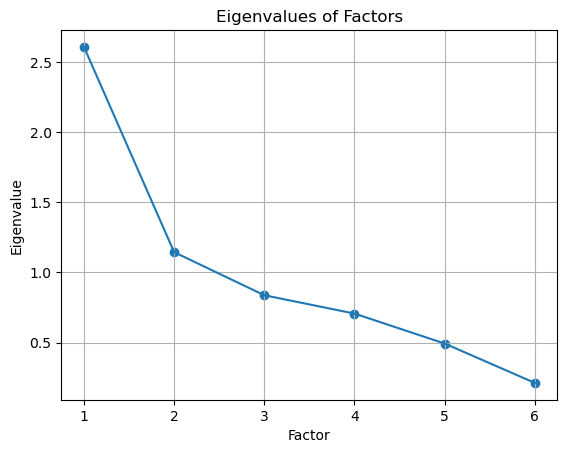

In [5]:
fa = FactorAnalyzer(n_factors= 2, rotation=None)
fa.fit(df)
load = fa.loadings_
e_val, e_vec = fa.get_eigenvalues()

plt.scatter(range(1, df.shape[1]+1), e_val)
plt.plot(range(1, df.shape[1]+1), e_val)
plt.title("Eigenvalues of Factors")
plt.xlabel("Factor")
plt.ylabel("Eigenvalue")
plt.grid()
plt.show()

I chose to set the number of Factors to 2 because only two of the Eigenvalues are above 1. The logic behind that is that the factors we want to keep should at least, have more variance than any of the original measured variables comprised in the factor.

In [6]:
pd.DataFrame(load,index=df.columns)

,0,1
Age,0.568205,0.211555
SystolicBP,0.858270,-0.246804
DiastolicBP,0.827487,-0.233271
BS,0.640698,0.500391
BodyTemp,-0.312713,0.134420
HeartRate,0.022040,0.275932


We can see in the table above, that factor 0 has an influenze on everything except the BodyTemp and specificaly a large influenze on Blood Pressure. Factor 1 has an influenze on everything except for the the two Blood Pressure (BP) values and it has a larg influenz on blood glucose levels (BS).

Lastly we can show how much of the variance is comprised in those two factors by calculating the cumulative Variance.

In [7]:
pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'])

,0,1
Variance,2.252988,0.504681
Proportional Var,0.375498,0.084114
Cumulative Var,0.375498,0.459612


From the tabel above we can tell that 45% of the variance is from the first two factores.